### Extension activity 3.2 Part A, B and C ###

Initiate Python

In [1]:
import os
import xlwings as xw
import pandas as pd
import numpy as np
import seaborn as sns
os.chdir('C:\\Users\\lubberMA\\OneDrive - Victoria University of Wellington - STAFF\\MyHDocs\\DocumentsRedir\\lecturing\\MMPA531\\Session 4\\python\\')

---

**Load the excel file**

In [2]:
df = pd.read_excel("PartA.xlsx").set_index("Staff ID")
df.columns = df.columns.str.lower().str.strip()
for _ in [" rating", "user experience ", " quality"]:
    df.columns = df.columns.str.replace(_, "")
    
df.sample(3)

,first name,last name,email,contact number; post code,dob,country,country .1,suburb,street name,building number,attendance channel,workshop satisfaction,workshop duration,workshop facilitator,website,leadership style
Staff ID,,,,,,,,,,,,,,,,
10053,Lucita,Deason,lucita.deason@wireselectrical.com,+61 283 377 2694;4152,1973-01-28,Australia,Australia,CAMP HILL,CITRINE,1,Online,3,2,2,6,5
10024,Penny,Smithson,penny.smithson@wireselectrical.com,+61 622 424 7433;4074,1964-09-09,Australia,Australia,MIDDLE PARK,BARUP,7,Online,7,5,7,6,5
10040,Fin,Nicolson,fin.nicolson@wireselectrical.com,+61 287 614 9273;4110,1978-07-17,Australia,Australia,PALLARA,BASSIN,2,Online,3,4,4,4,4


**Let's write a definition for re-use**

In [3]:
def load_excel(file_name):
    df = pd.read_excel(file_name).set_index("Staff ID")
    df.columns = df.columns.str.lower().str.strip()
    for _ in [" rating", "user experience ", " quality"]:
        df.columns = df.columns.str.replace(_, "")
    return df
        
df = load_excel("PartA.xlsx")
df.head(3)

,first name,last name,email,contact number; post code,dob,country,country .1,suburb,street name,building number,attendance channel,workshop satisfaction,workshop duration,workshop facilitator,website,leadership style
Staff ID,,,,,,,,,,,,,,,,
10000,Rutter,Willbraham,rutter.willbraham@wireselectrical.com,+61 172 264 4391;4171,1991-11-24,Australia,Australia,HAWTHORNE,AARON,45,On-site,5,4,3,6,4
10001,Bink,Peter,bink.peter@wireselectrical.com,+61 172 313 0279;4032,1977-02-18,Australia,Australia,CHERMSIDE,ABARTH,6A,Online,5,3,3,4,3
10002,Michelina,Sangra,michelina.sangra@wireselectrical.com,+61 703 687 0751;4122,1991-01-22,Australia,Australia,UPPER MOUNT GRAVATT,ABBEVILLE,41A,Online,3,1,4,6,4


---

### Check some basic stuff ###

In [4]:
df['country'].value_counts()

Australia    92
Name: country, dtype: int64

In [5]:
df.shape

(92, 16)

### Clean data ###

Split 'contact number' from 'post code', make sure that postcode is an integer

Delete the columns that we do not need.



In [6]:
df[['contact number','post code']] = df['contact number; post code'].str.split(';', 1, expand=True)
df['post code']= df['post code'].astype(int)

df = df.drop(['country .1', 'contact number; post code'], axis='columns')
df.tail(3)

,first name,last name,email,dob,country,suburb,street name,building number,attendance channel,workshop satisfaction,workshop duration,workshop facilitator,website,leadership style,contact number,post code
Staff ID,,,,,,,,,,,,,,,,
10089,Cari,Kem,cari.kem@wireselectrical.com,1992-01-21,Australia,BRISBANE CITY,QUEENS WHARF,5B,Online,7,5,6,7,4,+61 946 395 3680,4000
10090,Belvia,Collaton,belvia.collaton@wireselectrical.com,1982-03-08,Australia,DREWVALE,QUEENSBERRY,4,On-site,7,5,7,7,6,+61 684 669 1633,4116
10091,Milt,Tortoise,milt.tortoise@wireselectrical.com,1975-09-19,Australia,CHELMER,QUEENSCROFT,120,Online,7,5,6,4,6,+61 857 112 2478,4068


---

## Part B



### Create a frame with only relevant data ###



In [7]:
dfa = df.filter(regex = "workshop.*|leader.*|website.*")
dfa.sample(3)

,workshop satisfaction,workshop duration,workshop facilitator,website,leadership style
Staff ID,,,,,
10070,5,3,6,5,5
10043,7,7,5,5,5
10000,5,4,3,6,4


<AxesSubplot:>

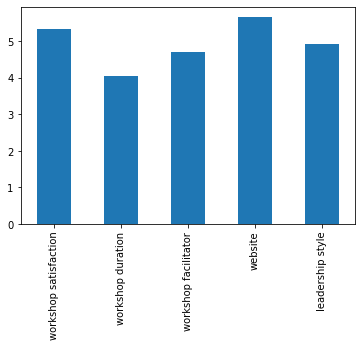

In [8]:
dfa.mean().plot(kind='bar')

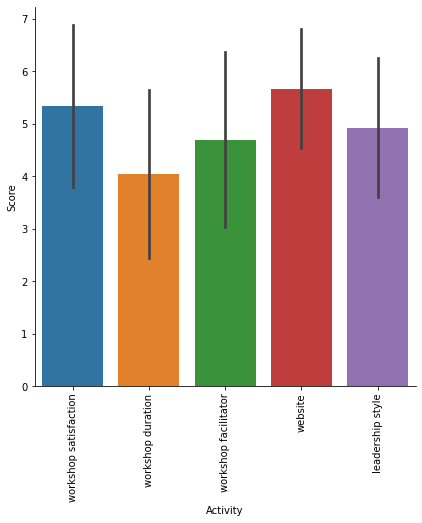

In [9]:
g = sns.catplot(data=dfa.stack().reset_index().rename(columns={'level_1': 'Activity', 0: 'Score' }), kind="bar", x="Activity", y="Score", height=6, ci="sd")
g.set_xticklabels(rotation=90)

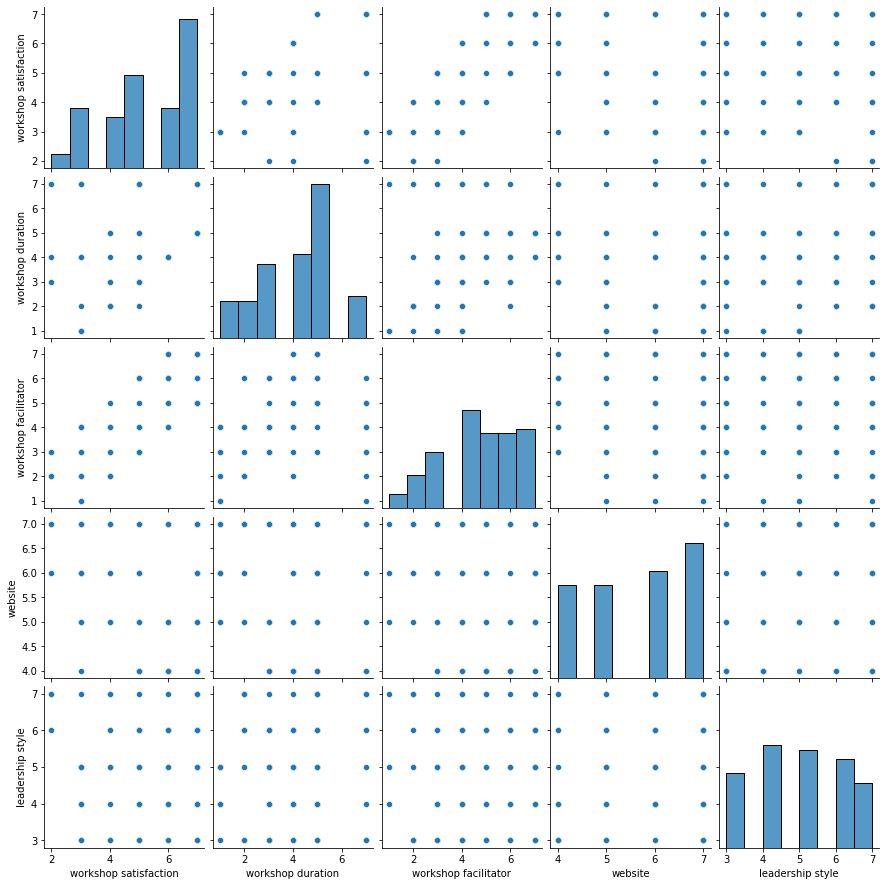

In [10]:
sns.pairplot(dfa)

In [11]:
dfa.describe()

,workshop satisfaction,workshop duration,workshop facilitator,website,leadership style
count,92.000000,92.000000,92.000000,92.000000,92.000000
mean,5.336957,4.043478,4.695652,5.663043,4.923913
std,1.556815,1.602971,1.675546,1.141400,1.327922
min,2.000000,1.000000,1.000000,4.000000,3.000000
25%,4.000000,3.000000,4.000000,5.000000,4.000000
50%,5.000000,4.000000,5.000000,6.000000,5.000000
75%,7.000000,5.000000,6.000000,7.000000,6.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000


In [12]:
dfa.corr()

,workshop satisfaction,workshop duration,workshop facilitator,website,leadership style
workshop satisfaction,1.000000,0.531289,0.785402,-0.201323,0.033800
workshop duration,0.531289,1.000000,0.389577,-0.039954,0.115146
workshop facilitator,0.785402,0.389577,1.000000,-0.209354,-0.020400
website,-0.201323,-0.039954,-0.209354,1.000000,0.345407
leadership style,0.033800,0.115146,-0.020400,0.345407,1.000000


<AxesSubplot:>

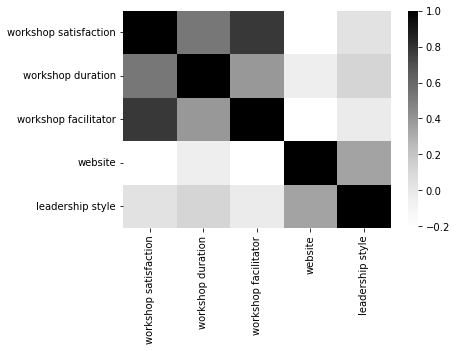

In [13]:
sns.heatmap(dfa.corr(), cmap="Greys")

### Port the data to Excel ###

In [14]:
def port_to_excel(df):
    wb = xw.Book()
    sht = wb.sheets['Sheet1']
    sht.range('A1').value = df
    
port_to_excel(df)    

---

### t-test


In [15]:
from scipy.stats import ttest_ind

df = load_excel("PartC.xlsx")
dfa = df.filter(regex = "workshop.*|leader.*|website.*")
dfa.head()

,workshop satisfaction,workshop duration,workshop facilitator,website,leadership style
Staff ID,,,,,
10001,5,3,3,4,3
10002,3,1,4,6,4
10004,7,5,5,5,5
10008,5,5,5,6,3
10011,7,5,6,5,4


In [16]:
dfa=dfa.join(df['attendance channel'])
dfa.head()

,workshop satisfaction,workshop duration,workshop facilitator,website,leadership style,attendance channel
Staff ID,,,,,,
10001,5,3,3,4,3,Online
10002,3,1,4,6,4,Online
10004,7,5,5,5,5,Online
10008,5,5,5,6,3,Online
10011,7,5,6,5,4,Online


**Write a function for the t-tests:**

In [17]:
def ttest(df, split_var, testvar):
    # Get the values for the split variable
    s = dfa[split_var].value_counts()
    s=list(s.index)
    # Get groups
    group1 = df[df[split_var]==s[0]][testvar]
    group2 = df[df[split_var]==s[1]][testvar]
    t = ttest_ind(group1, group2)
    # Print results
    print(f'{testvar.capitalize()}:' )
    print(f'{s[0]} mean {group1.mean():.3f}' )
    print(f'{s[1]} mean {group2.mean():.3f}' )
    if group1.mean() >= group2.mean():
        print(f'Difference {s[0]} minus {s[1]}: {group1.mean()-group2.mean():.3f}\n')
        print(f'T-test statistic: {t[0]:.3f}')
    else:
        print(f'Difference {s[1]} minus {s[0]}: {group2.mean()-group1.mean():.3f}')
        print(f'T-test statistic: {-t[0]:.3f}')
    print(f'T-test p-value: {t[1]:.3f}, two-tailed')
    print(f'T-test p-value: {t[1]/2.0:.3f}, one-tailed')
    return(t)

In [18]:
t = ttest(df, 'attendance channel', 'workshop satisfaction' )

Workshop satisfaction:
Online mean 5.175
On-site mean 5.600
Difference On-site minus Online: 0.425
T-test statistic: 1.274
T-test p-value: 0.206, two-tailed
T-test p-value: 0.103, one-tailed


In [19]:
t = ttest(df, 'attendance channel', 'workshop duration')

Workshop duration:
Online mean 3.789
On-site mean 4.457
Difference On-site minus Online: 0.668
T-test statistic: 1.970
T-test p-value: 0.052, two-tailed
T-test p-value: 0.026, one-tailed


In [20]:
t = ttest(df, 'attendance channel', 'workshop facilitator')

Workshop facilitator:
Online mean 4.509
On-site mean 5.000
Difference On-site minus Online: 0.491
T-test statistic: 1.372
T-test p-value: 0.174, two-tailed
T-test p-value: 0.087, one-tailed


In [21]:
dfa.corr()

,workshop satisfaction,workshop duration,workshop facilitator,website,leadership style
workshop satisfaction,1.000000,0.531289,0.785402,-0.201323,0.033800
workshop duration,0.531289,1.000000,0.389577,-0.039954,0.115146
workshop facilitator,0.785402,0.389577,1.000000,-0.209354,-0.020400
website,-0.201323,-0.039954,-0.209354,1.000000,0.345407
leadership style,0.033800,0.115146,-0.020400,0.345407,1.000000


<AxesSubplot:xlabel='workshop duration', ylabel='workshop satisfaction'>

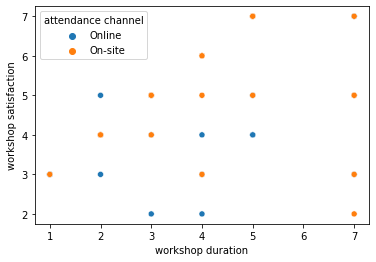

In [22]:
sns.scatterplot(data=dfa, x="workshop duration", y="workshop satisfaction", hue='attendance channel')

<AxesSubplot:xlabel='workshop duration', ylabel='workshop satisfaction'>

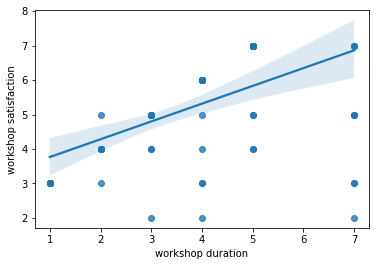

In [23]:
sns.regplot(data=dfa, x="workshop duration", y="workshop satisfaction")

<AxesSubplot:xlabel='workshop facilitator', ylabel='workshop satisfaction'>

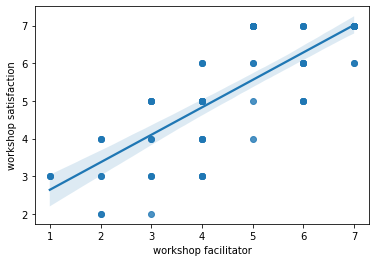

In [24]:
sns.regplot(data=dfa, x="workshop facilitator", y="workshop satisfaction")